*SECTION 1.*

Authors:
1. Nasim Ranjbari

2. Alvin Lee

3. Sahil Walia

4. Balbir Singh

5. Miao

Project Name: CIS 591 Python for Data Analysis

Duration: Sept. - Oct. 2024

Faculty: Prof. Lu Xiao

**Problem statement.**


We are conducting an analysis of the Property Maintenance dataset, which captures complaints and concerns reported by residents in the Phoenix area. Our goal is to derive key insights from the data to aid in decision-making.

Specifically, we aim to:

1. Identify the top neighborhoods with the highest number of reported complaints.
2. Evaluate neighborhoods based on complaint metrics to suggest the top neighborhoods to live in.
3. Analyze the status of complaints (open, closed, in progress) and the number of inspections required to resolve them.
4. Examine whether there is a correlation between the number of inspections and complaint resolution.
5. This analysis will provide insights into the maintenance concerns within different neighborhoods and inform potential improvements in service response and neighborhood conditions.

**Dataset: describe the dataset**

The dataset is related to neighborhood services and property maintenance which is updated on a monthly basis.

Raw Data attributes-
Total Rows = 106322 , Total Columns = 6

It contains the following fields (Data type mentioned in parenthesis)
1.  CSM_CASENO - Case Number (VARCHAR) - Unique identifier of the enforcement case, can serve as the primary key for our table.
2.  CSM_ADDRESS - Address (VARCHAR) – Address of the property being inspected, can be used to categorize the locations.
3.  PRC_COUN_DIST - Council District (INTEGER) – Council district number pertaining to the address.
4.  CSM_STATUS – Status (VARCHAR) – A description of the current case and its status.
5.  TOTAL_INSP – Number of completed inspections (INTEGER) – Total number of completed inspections for the given case number.
6.  NOTES – Notes (VARCHAR) – Inspection notes for the given case number.



*SECTION 2.*

**Pseudo Code**

1.	Load and Clean Data

  *   Load the CSV file
  *   Check for missing or duplicate valuse
  *   Clean the dataset to remove duplicates and handle missing/trash values

2.	Descriptive Analysis

  *   Count the total number of unique cases
  *   Identify total inspections for the dataset
  *   Count the total number of cases by case status
  *   Count the total number of cases by council district

3.	Inspection Performance Analysis

  *   Find the top 3 districts with most complaints
  *   Find properties with the highest number of inspections
  *   Find average inspections per status

4.	Correlation Analysis

  *   Identify the closed/resolved vs non-closed cases
  *   Calculate correlation between total inspections and resolved cases

5.	Anomaly Detection

  *   Find properties with unusually high inspections

6.	Final Results

  *   Infer and display top reasons for complaints
  *   Identify council districts with most cases
  *   Infer correlation between inspections and case resolutions

7. Interpretation and conclusion

  * Interpret the results and provide conclusion


SECTION 3.

Code

**1. Loading the dataset**

In [ ]:
#Use Pandas library
import pandas as pd
# Load the dataset
file_path = 'property_maintenance_data.xls'
df_source = pd.read_excel(file_path)
# Verify if the dataset is correctly loaded
df_source.head()

,CSM_CASENO,CSM_ADDRESS,PRC_COUN_DIST,CSM_STATUS,TOTAL_INSP,NOTES
0,PEF2022-14231,2400 S 14TH ST PHOENIX 85034-6603,8.0,CLOSED COMPLIANCE,7,It has been observed that there is over height...
1,PEF2022-23580,3145 W LANE AVE PHOENIX 85051-6522,5.0,CLOSED COMPLIANCE,2,Viewed an accumulation of over height grass/we...
2,PEF2022-33848,2111 W LAUREL LN PHOENIX 85029-3505,3.0,CLOSED COMPLIANCE,2,Observed grass/weeds in excess of six inches i...
3,PEF2022-31517,1008 S 4TH AVE PHOENIX 85003,8.0,CLOSED COMPLIANCE,5,Vegetation exceeding 6 inches located througho...
4,PEF2022-15016,1338 E ANGELA DR PHOENIX 85022-2071,3.0,CLOSED AFTER TICKET,6,It has been reported that there is grass/weeds...


In [ ]:
# Step 1: Remove rows where the address starts with 'UNKNOWN NO ADDRESS'
df = df_source[~df_source['CSM_ADDRESS'].str.startswith('UNKNOW NO ADDRESS', na=False)]

# Step 2: Remove rows with null values in any field
df = df.dropna()

# Step 3: Remove rows where the 'NOTES' field contains the word 'Error'
df = df[~df['NOTES'].str.contains('Error', na=False)]

#Displaying total columns and rows
total_rows, total_columns = df.shape
print('Total Columns x Total Rows: ',total_columns ,'x', total_rows)

# Displaying the cleaned data (this will print out the first few rows)
print(df.head())



Total Columns x Total Rows:  6 x 16187
      CSM_CASENO                          CSM_ADDRESS  PRC_COUN_DIST  \
0  PEF2022-14231    2400 S 14TH ST PHOENIX 85034-6603            8.0   
1  PEF2022-23580   3145 W LANE AVE PHOENIX 85051-6522            5.0   
2  PEF2022-33848  2111 W LAUREL LN PHOENIX 85029-3505            3.0   
3  PEF2022-31517         1008 S 4TH AVE PHOENIX 85003            8.0   
4  PEF2022-15016  1338 E ANGELA DR PHOENIX 85022-2071            3.0   

            CSM_STATUS  TOTAL_INSP  \
0    CLOSED COMPLIANCE           7   
1    CLOSED COMPLIANCE           2   
2    CLOSED COMPLIANCE           2   
3    CLOSED COMPLIANCE           5   
4  CLOSED AFTER TICKET           6   

                                               NOTES  
0  It has been observed that there is over height...  
1  Viewed an accumulation of over height grass/we...  
2  Observed grass/weeds in excess of six inches i...  
3  Vegetation exceeding 6 inches located througho...  
4  It has been reported 

Roll up the Case status buckets into simpler categories for analysis

In [ ]:
# Define a function to bucket the case statuses
def categorize_status(status):
    if status in [
        'CLOSED COMPLIANCE', 'CLOSED NO VIOLATION FOUND', 'CLOSED AFTER TICKET',
        'CLOSED - ABATED BY OWNER', 'CLOSED - REFERRED', 'CLOSED -ABATED BY CITY',
        'CLOSED-VACANT UNIT', 'CASE CLOSED - REF PUBLIC WORKS', 'CASE CLOSED - WRONG ADDRESS',
        'CLOSED THROUGH APPEAL PROCESS', 'CASE CLOSED - REF POLICE', 'CLOSED - NON-CONFORMING USE',
        'CASE CLOSED - INFO ONLY', 'CASE CLOSED - REF ADOT', 'CLOSED-REFERRED TO CIT',
        'CASE CLOSED - REF VOLUNTEER'
    ]:
        return 'Closed - Resolved'
    elif status in ['INITIAL INSPECTION', 'IN RESEARCH', 'SCHEDULED INTERIOR INSPECTION']:
        return 'In Progress or Ongoing'
    elif status in [
        'NOTICE OF VIOLATION ISSUED', 'TICKET ISSUED', 'ABATEMENT',
        'EXTENSION GRANTED', 'REQUESTED ASSISTANCE'
    ]:
        return 'Tickets or Notices Issued'
    elif status in [
        'CASE REFERRED', 'CASE CLOSED - REF STREETS', 'CASE CLOSED - REF PUBLIC WORKS',
        'CASE CLOSED - REF POLICE', 'CASE CLOSED - REF ADOT', 'CASE CLOSED - REF VOLUNTEER'
    ]:
        return 'Referred to Other Departments'
    elif status in [
        'CLOSED - NO RESOLUTION', 'CLOSED - HARDSHIP ASSISTANCE',
        'CASE HAS BEEN UNFROZEN', 'CLOSED-REFERRED TO CIT'
    ]:
        return 'Unresolved or Exceptional Cases'
    else:
        return 'Other'

# Apply the function to create a new column
df['status_bucket'] = df['CSM_STATUS'].apply(categorize_status)

# Verify the new DataFrame with the added column
df.head()


,CSM_CASENO,CSM_ADDRESS,PRC_COUN_DIST,CSM_STATUS,TOTAL_INSP,NOTES,status_bucket
0,PEF2022-14231,2400 S 14TH ST PHOENIX 85034-6603,8.0,CLOSED COMPLIANCE,7,It has been observed that there is over height...,Closed - Resolved
1,PEF2022-23580,3145 W LANE AVE PHOENIX 85051-6522,5.0,CLOSED COMPLIANCE,2,Viewed an accumulation of over height grass/we...,Closed - Resolved
2,PEF2022-33848,2111 W LAUREL LN PHOENIX 85029-3505,3.0,CLOSED COMPLIANCE,2,Observed grass/weeds in excess of six inches i...,Closed - Resolved
3,PEF2022-31517,1008 S 4TH AVE PHOENIX 85003,8.0,CLOSED COMPLIANCE,5,Vegetation exceeding 6 inches located througho...,Closed - Resolved
4,PEF2022-15016,1338 E ANGELA DR PHOENIX 85022-2071,3.0,CLOSED AFTER TICKET,6,It has been reported that there is grass/weeds...,Closed - Resolved


**2. Descriptive Analysis**

In [ ]:
# Count the total number of unique cases
total_cases = df['CSM_CASENO'].nunique()
print(f"Total Cases: {total_cases}")

Total Cases: 16187


In [ ]:
# Sum of total inspections conducted
total_inspections = df['TOTAL_INSP'].sum()
print(f"Total Inspections: {total_inspections}")

Total Inspections: 55944


In [ ]:
# Count cases by case status
case_status_count = df['status_bucket'].value_counts()
print('Total cases by case status:  ' ,case_status_count)

Total cases by case status:   status_bucket
Closed - Resolved                  15275
Tickets or Notices Issued            645
In Progress or Ongoing               234
Unresolved or Exceptional Cases       16
Referred to Other Departments         12
Other                                  5
Name: count, dtype: int64


Displaying the relevant visuals for the dataset

  2.1 Council District Distribution: Bar chart showing the count of cases per council district.

  Interpretation: This graph highlights which council districts have the highest number of property maintenance cases. It helps identify which areas may need more attention or resources.

  2.2 Status Breakdown: Bar chart representing the distribution of case statuses (status_bucket).

  Interpretation: This visualization shows the breakdown of case statuses, helping to understand the proportion of resolved, ongoing, and referred cases. It provides insights into the overall efficiency of the system.






<ipython-input-8-41276b17d37e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='PRC_COUN_DIST', palette='gray')


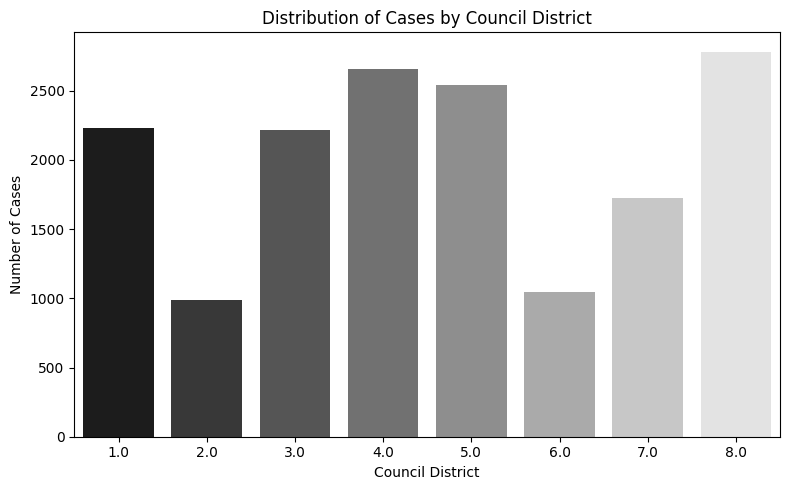

<ipython-input-8-41276b17d37e>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='status_bucket', palette='gray')


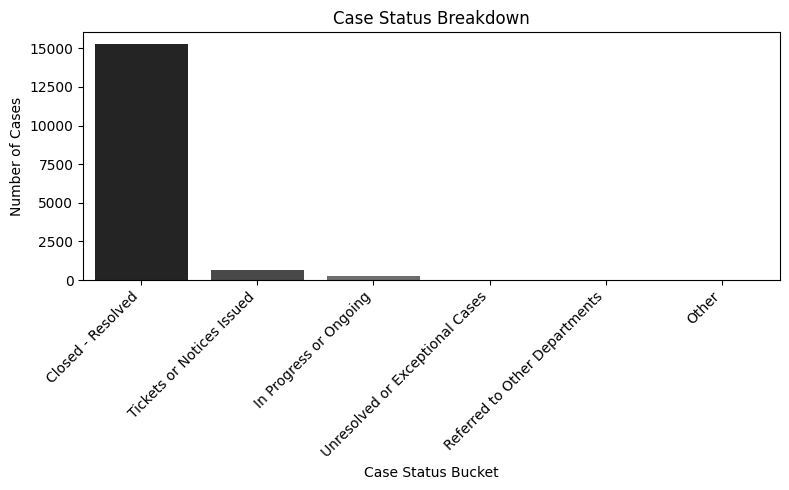

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Descriptive Analysis

# 2.1 Council District Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='PRC_COUN_DIST', palette='gray')
plt.xlabel('Council District')
plt.ylabel('Number of Cases')
plt.title('Distribution of Cases by Council District')
plt.tight_layout()
plt.show()

# 2.2 Status Breakdown
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='status_bucket', palette='gray')
plt.xlabel('Case Status Bucket')
plt.ylabel('Number of Cases')
plt.title('Case Status Breakdown')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

3. Inspection Performance

  3.1 Top Inspected Cases: Bar chart showing the top 10 cases with the most inspections.

  Interpretation: This graph identifies the individual cases that required the most follow-up. It could indicate particularly challenging or problematic cases that required repeated inspections.

  3.2 Average Inspections per Case Status: Bar chart of the average number of inspections by status_bucket.

  Interpretation: This graph shows the average number of inspections needed for different case statuses. It helps assess whether certain types of cases are more resource-intensive in terms of inspections.

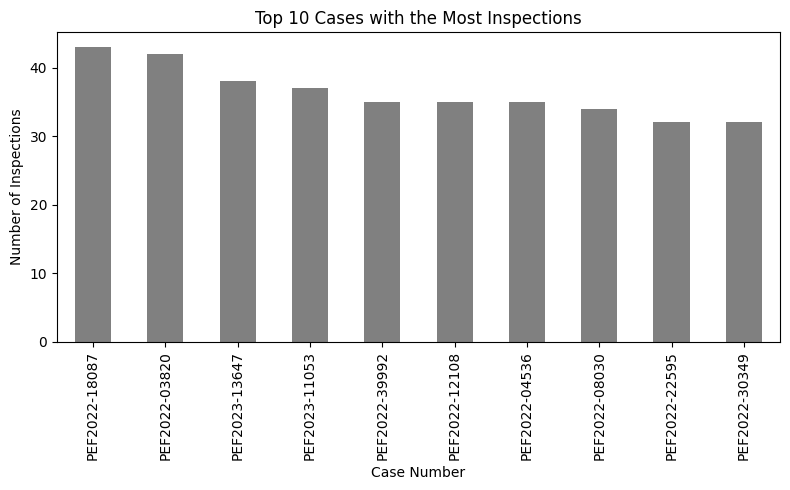

<ipython-input-9-e2a0d35a265f>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_inspections_per_status.index, y=avg_inspections_per_status.values, palette='gray')


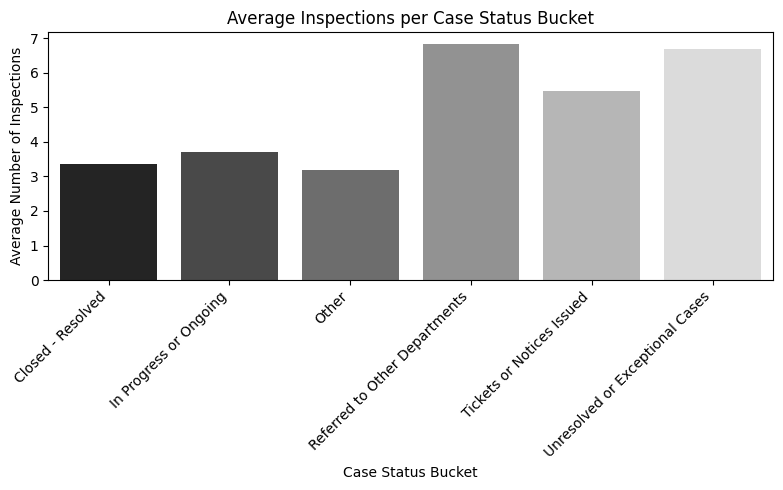

In [ ]:
# 3. Inspection Performance

# 3.1 Inspection Frequency: Cases with the Most Inspections
top_inspected_cases = df.groupby('CSM_CASENO')['TOTAL_INSP'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 5))
top_inspected_cases.plot(kind='bar', color='gray')
plt.xlabel('Case Number')
plt.ylabel('Number of Inspections')
plt.title('Top 10 Cases with the Most Inspections')
plt.tight_layout()
plt.show()

# 3.2 Case Resolution Efficiency: Inspections vs. Status Bucket
avg_inspections_per_status = df.groupby('status_bucket')['TOTAL_INSP'].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_inspections_per_status.index, y=avg_inspections_per_status.values, palette='gray')
plt.xlabel('Case Status Bucket')
plt.ylabel('Average Number of Inspections')
plt.title('Average Inspections per Case Status Bucket')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

4. Correlation and Relationships:

  4.1 Correlation between Number of Inspections and Case

  Status: Scatter plot depicting the relationship between TOTAL_INSP (number of inspections) and status_bucket.

  Interpretation: This scatter plot visualizes whether there is a correlation between the number of inspections and the likelihood of a case being resolved or remaining open. It provides insights into how inspection frequency affects resolution.

  4.2 Total Number of Inspections by Council District: Bar chart showing the total number of inspections per council district.

  Interpretation: This chart reveals which council districts had the most inspections, indicating areas that required the most municipal resources for property maintenance issues.

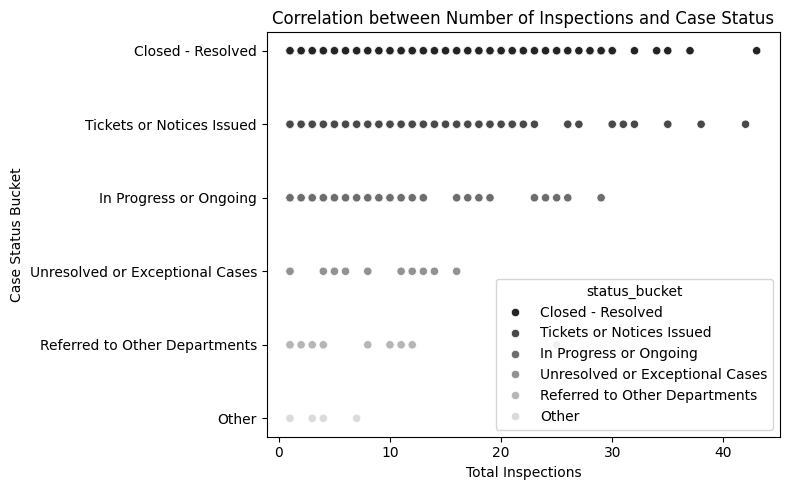

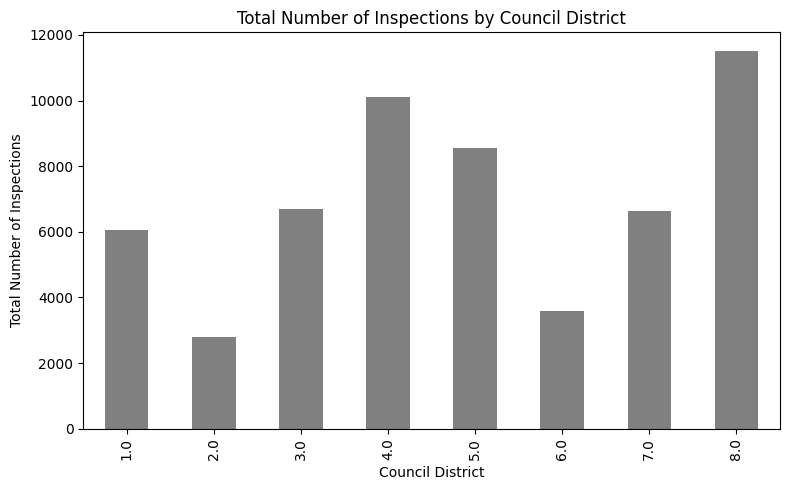

In [ ]:
# 4. Correlation and Relationships

# 4.1 Correlation between Inspections and Case Resolution
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='TOTAL_INSP', y='status_bucket', hue='status_bucket', palette='gray')
plt.xlabel('Total Inspections')
plt.ylabel('Case Status Bucket')
plt.title('Correlation between Number of Inspections and Case Status')
plt.tight_layout()
plt.show()

# 4.2 Council District and Inspection Count
inspection_count_per_district = df.groupby('PRC_COUN_DIST')['TOTAL_INSP'].sum()
plt.figure(figsize=(8, 5))
inspection_count_per_district.plot(kind='bar', color='gray')
plt.xlabel('Council District')
plt.ylabel('Total Number of Inspections')
plt.title('Total Number of Inspections by Council District')
plt.tight_layout()
plt.show()



5. Outlier Detection for Inspections:

   Box plot representing the distribution of the total number of inspections.

  Interpretation: The box plot helps detect outliers, indicating properties that had unusually high numbers of inspections. These outliers could represent problematic properties or mismanaged cases.

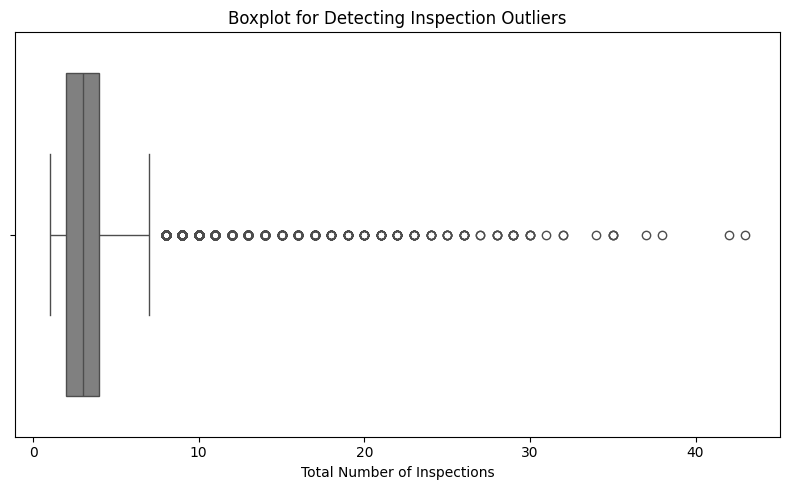

In [ ]:
# 5. Outlier Detection

# 5.1 Outlier Detection: Cases with Unusually High Inspections
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='TOTAL_INSP', color='gray')
plt.xlabel('Total Number of Inspections')
plt.title('Boxplot for Detecting Inspection Outliers')
plt.tight_layout()
plt.show()

Plotting Distribution of cases by council districts with each case bucket as percentage of total

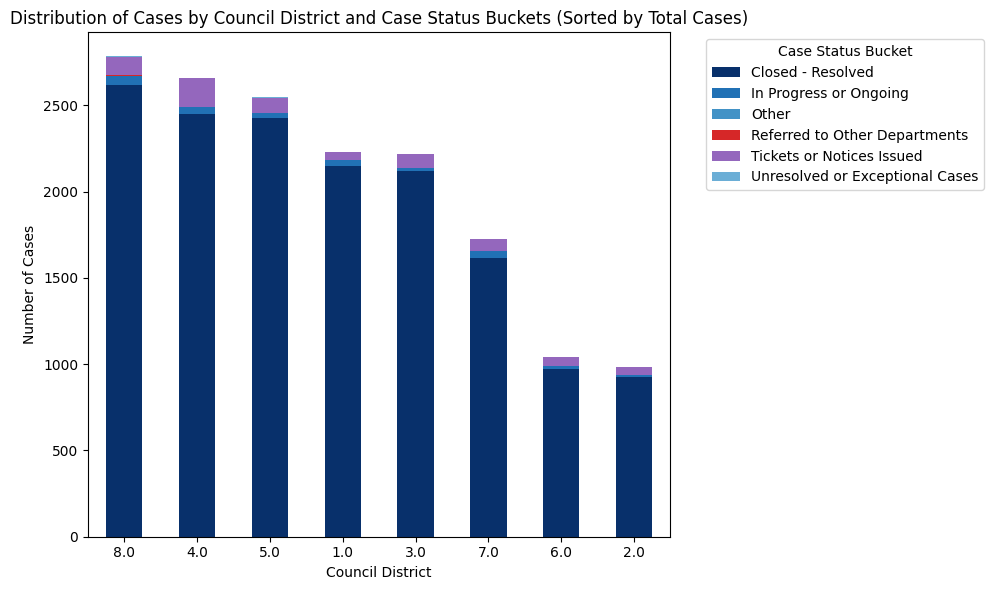

In [ ]:
# Create a pivot table to get counts of each status bucket for each council district
pivot_data = df.pivot_table(index='PRC_COUN_DIST', columns='status_bucket', aggfunc='size', fill_value=0)

# Add a column for total cases to sort by total count
pivot_data['Total_Cases'] = pivot_data.sum(axis=1)

# Sort the pivoted data by the total number of cases in descending order
pivot_data_sorted = pivot_data.sort_values(by='Total_Cases', ascending=False).drop(columns='Total_Cases')

# Define a custom color palette with more visible, vibrant colors
custom_colors = ['#08306B', '#2171B5', '#4292C6', '#d62728', '#9467bd', '#6BAED6', '#9ECAE1']  # Different vibrant colors

# Create a stacked bar chart to show distribution of cases by council district and status bucket (sorted)
plt.figure(figsize=(10, 6))
pivot_data_sorted.plot(kind='bar', stacked=True, color=custom_colors, ax=plt.gca())
plt.xlabel('Council District')
plt.ylabel('Number of Cases')
plt.title('Distribution of Cases by Council District and Case Status Buckets (Sorted by Total Cases)')
plt.xticks(rotation=0)
plt.legend(title='Case Status Bucket', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the bar chart
plt.show()

Districts 4 and 8 have the highest case counts, districts 2 and 6 being the lowest.

In [ ]:
# Filter the dataset for council district 8
df_district_8 = df[df['PRC_COUN_DIST'] == 8]

# Calculate the average number of inspections per case status for council district 8
avg_inspections_per_status_district_8 = df_district_8.groupby('status_bucket')['TOTAL_INSP'].mean()
round_insp_per_status= avg_inspections_per_status_district_8.round()
# Display the result
print('Average Inspections per case status',round_insp_per_status)

Average Inspections per case status status_bucket
Closed - Resolved                   4.0
In Progress or Ongoing              4.0
Referred to Other Departments      12.0
Tickets or Notices Issued           6.0
Unresolved or Exceptional Cases     6.0
Name: TOTAL_INSP, dtype: float64


The Cases that were referred to other departments have the highest number of average inspections. We can assume these are complex cases that may require more resources to resolve.

In [ ]:
# Displaying the cases from dataset with highest inspections
#Importing Tablulate to convert results to a table
from tabulate import tabulate

# Assuming df is your dataset, filter the data based on case numbers
case_numbers = [
    'PEF2022-18087', 'PEF2022-03820', 'PEF2022-27283',
    'PEF2023-13647', 'PEF2023-11053', 'PEF2022-39992',
    'PEF2022-04536', 'PEF2022-12108', 'PEF2022-30349', 'PEF2022-22595'
]

# Filter the cases based on the case numbers
filtered_cases = df[df['CSM_CASENO'].isin(case_numbers)]

# Select relevant columns for summary
columns_to_view = ['CSM_CASENO', 'CSM_STATUS', 'TOTAL_INSP', 'PRC_COUN_DIST', 'NOTES']

# Create the filtered summary
filtered_cases_summary = filtered_cases[columns_to_view]

# Display the filtered cases as a well-formatted table with borders
print(tabulate(filtered_cases_summary, headers='keys', tablefmt='grid'))


+------+---------------+--------------------------+--------------+-----------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|      | CSM_CASENO    | CSM_STATUS               |   TOTAL_INSP |   PRC_COUN_DIST | NOTES                                                                                                                                                                                   |
+======+===============+==========================+==============+=================+=========================================================================================================================================================================================+
|   27 | PEF2022-22595 | CLOSED - ABATED BY OWNER |           32 |               7 | ABATEMENT: BOARD UP NEXT ACTION: Abated by new owner VEG, TRASH, ROW, NUISANCE ABATED BY COP - SIGN RE

We can see that most complaints hover around litter/trash/ vehicle parking. No valid reason for high number of inspections is given, however we can infer slow resolution as one of the reasons.

Further we can retrieve the most commonly occuring words/phrases from the dataset using wordcloud.

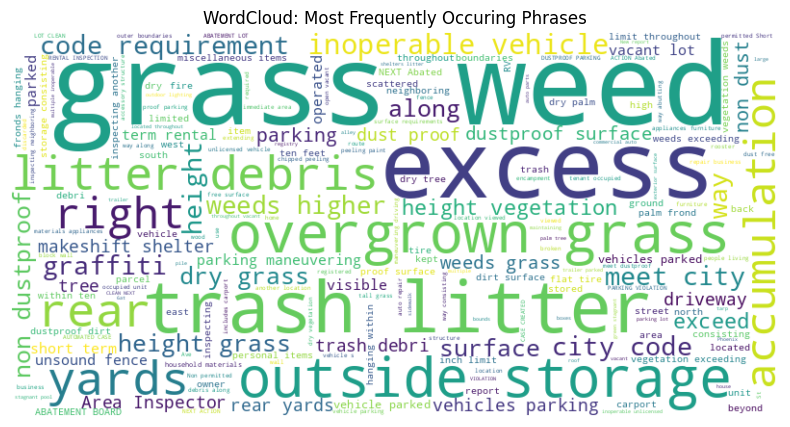

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#Assign Text to Notes field
notes_text = " ".join(note for note in df['NOTES'].dropna())

#Adding a filter to exclude words that are less helpful for our analysis
stopwords = set(WordCloud().stopwords)
additional_stopwords = {'front','six','6','inches','dead','yard','side','reported', 'property', 'observed', 'has', 'been', 'the', 'and', 'that', 'there', 'is', 'in', 'of', 'to', 'an', 'it'}
stopwords.update(additional_stopwords)

# Generate a new word cloud excluding the generic words
wordcloud_filtered = WordCloud(width=800, height=400, background_color='white', colormap='viridis', stopwords=stopwords).generate(notes_text)

# Display the filtered word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_filtered, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud: Most Frequently Occuring Phrases')
plt.show()

# Results:
- Our analysis reveals that some Phoenix neighborhoods report significantly more property maintenance issues than others, potentially due to higher population density, socio-economic challenges, or more active inspection efforts. Neighborhoods with fewer complaints may either have fewer issues or less stringent enforcement.

- Most complaints are resolved efficiently, but cases requiring multiple inspections—especially those involving tickets or formal notices—take longer and demand more resources. These more complex cases, often in neighborhoods with persistent issues, indicate a need for additional attention and resources.

- We observed a strong connection between the number of inspections and the likelihood of a case being unresolved or still in progress. Some neighborhoods show a higher average number of inspections, pointing to ongoing or complicated problems, including a few outlier cases that required unusually high inspection efforts, likely due to repeat violations or complex maintenance concerns.

# Interpretation:
The data analysis highlights key insights into property maintenance issues reported in Phoenix:
  - Districts 4 and 8 have the highest number of complaints, indicating these areas may face challenges like higher population density or socio-economic factors.
  - District 2 and 6 have lowest number of cases reported, as well as low inspections and resolved cases.
  - Cases involving formal notices or tickets require more inspections to resolve, while those resolved without enforcement tend to require fewer inspections. This shows a clear link between the number of inspections and the complexity of the issue. Common complaints, such as overgrown grass and weeds, parking issues, point to recurring issues that could be addressed with targeted efforts.
  - By focusing resources on high-complaint areas and adopting practices from neighborhoods where issues are resolved efficiently, Phoenix can improve property maintenance services and neighborhood conditions overall.



SECTION 4.

**Teamwork - description of each member's work.**
Team members work: description of what each team member has done for the project

1. Nasim: Psuedocode Development/ Formatting and documentation.

2. Alvin: Pseudocode Development.

3. Sahil: Exploratory Analysis/ Code Development.

4. Balbir: Exploratory Analysis/ Code Development.

5. Miao: Pseudocode Development/ Code Development.

SECTION 5.

**Teamwork - Percentage of each member's work in the whole team.**
Team members' work: the percentage of the contribution to the teamwork.

1. Nasim: 20%

2. Alvin: 20%

3. Sahil: 20%

4. Balbir: 20%

5. Miao: 20%